# Face Recognition using Convulutional Neural Network

## Objective : Use a deep convolutional neural network to perform facial recognition using Keras.

## Dataset Description:
*    ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images per person. 
*    The images were taken at different times, lighting and facial expressions. 
*    The faces are in an upright position in frontal view, with a slight left-right rotation.


### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import LeakyReLU
import cv2


In [20]:
#loading the data
data = np.load('../input/facerecognition/ORL_faces.npz')

In [21]:
#checking what's inside the dataset
np.array(data)

array(['testY', 'testX', 'trainX', 'trainY'], dtype='<U6')

In [22]:
# extracting the test set and training set 
X_train=data['trainX']
X_test=data['testX']
y_train=data['trainY']
y_test=data['testY']

In [24]:
# checking the number of catogeries available in the dataset
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=uint8)

## Data set is equally distributed i.e the number of samples of each class are equal

In [27]:
#checking if there is any data Imbalances or Biases 
pd.Series(np.array(y_train)).value_counts()

19    12
18    12
1     12
2     12
3     12
4     12
5     12
6     12
7     12
8     12
9     12
10    12
11    12
12    12
13    12
14    12
15    12
16    12
17    12
0     12
dtype: int64

# The data set is composed of  20 catogeries  now lets visualize all the catogeries 

In [25]:
# extracting 1 sample each from all the catogeries and displaying it using matplotlib library 

In [38]:
# input image dimensions
img_rows, img_cols = 112, 92

catogeries=np.unique(y_train)

samples=[]

for catogery in catogeries:
    sample=x_train[y_train[y_train==catogery]][0]
    sample=sample.reshape(img_rows,img_cols)
    samples.append(sample)
    

In [40]:
samples=np.array(samples)

In [37]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

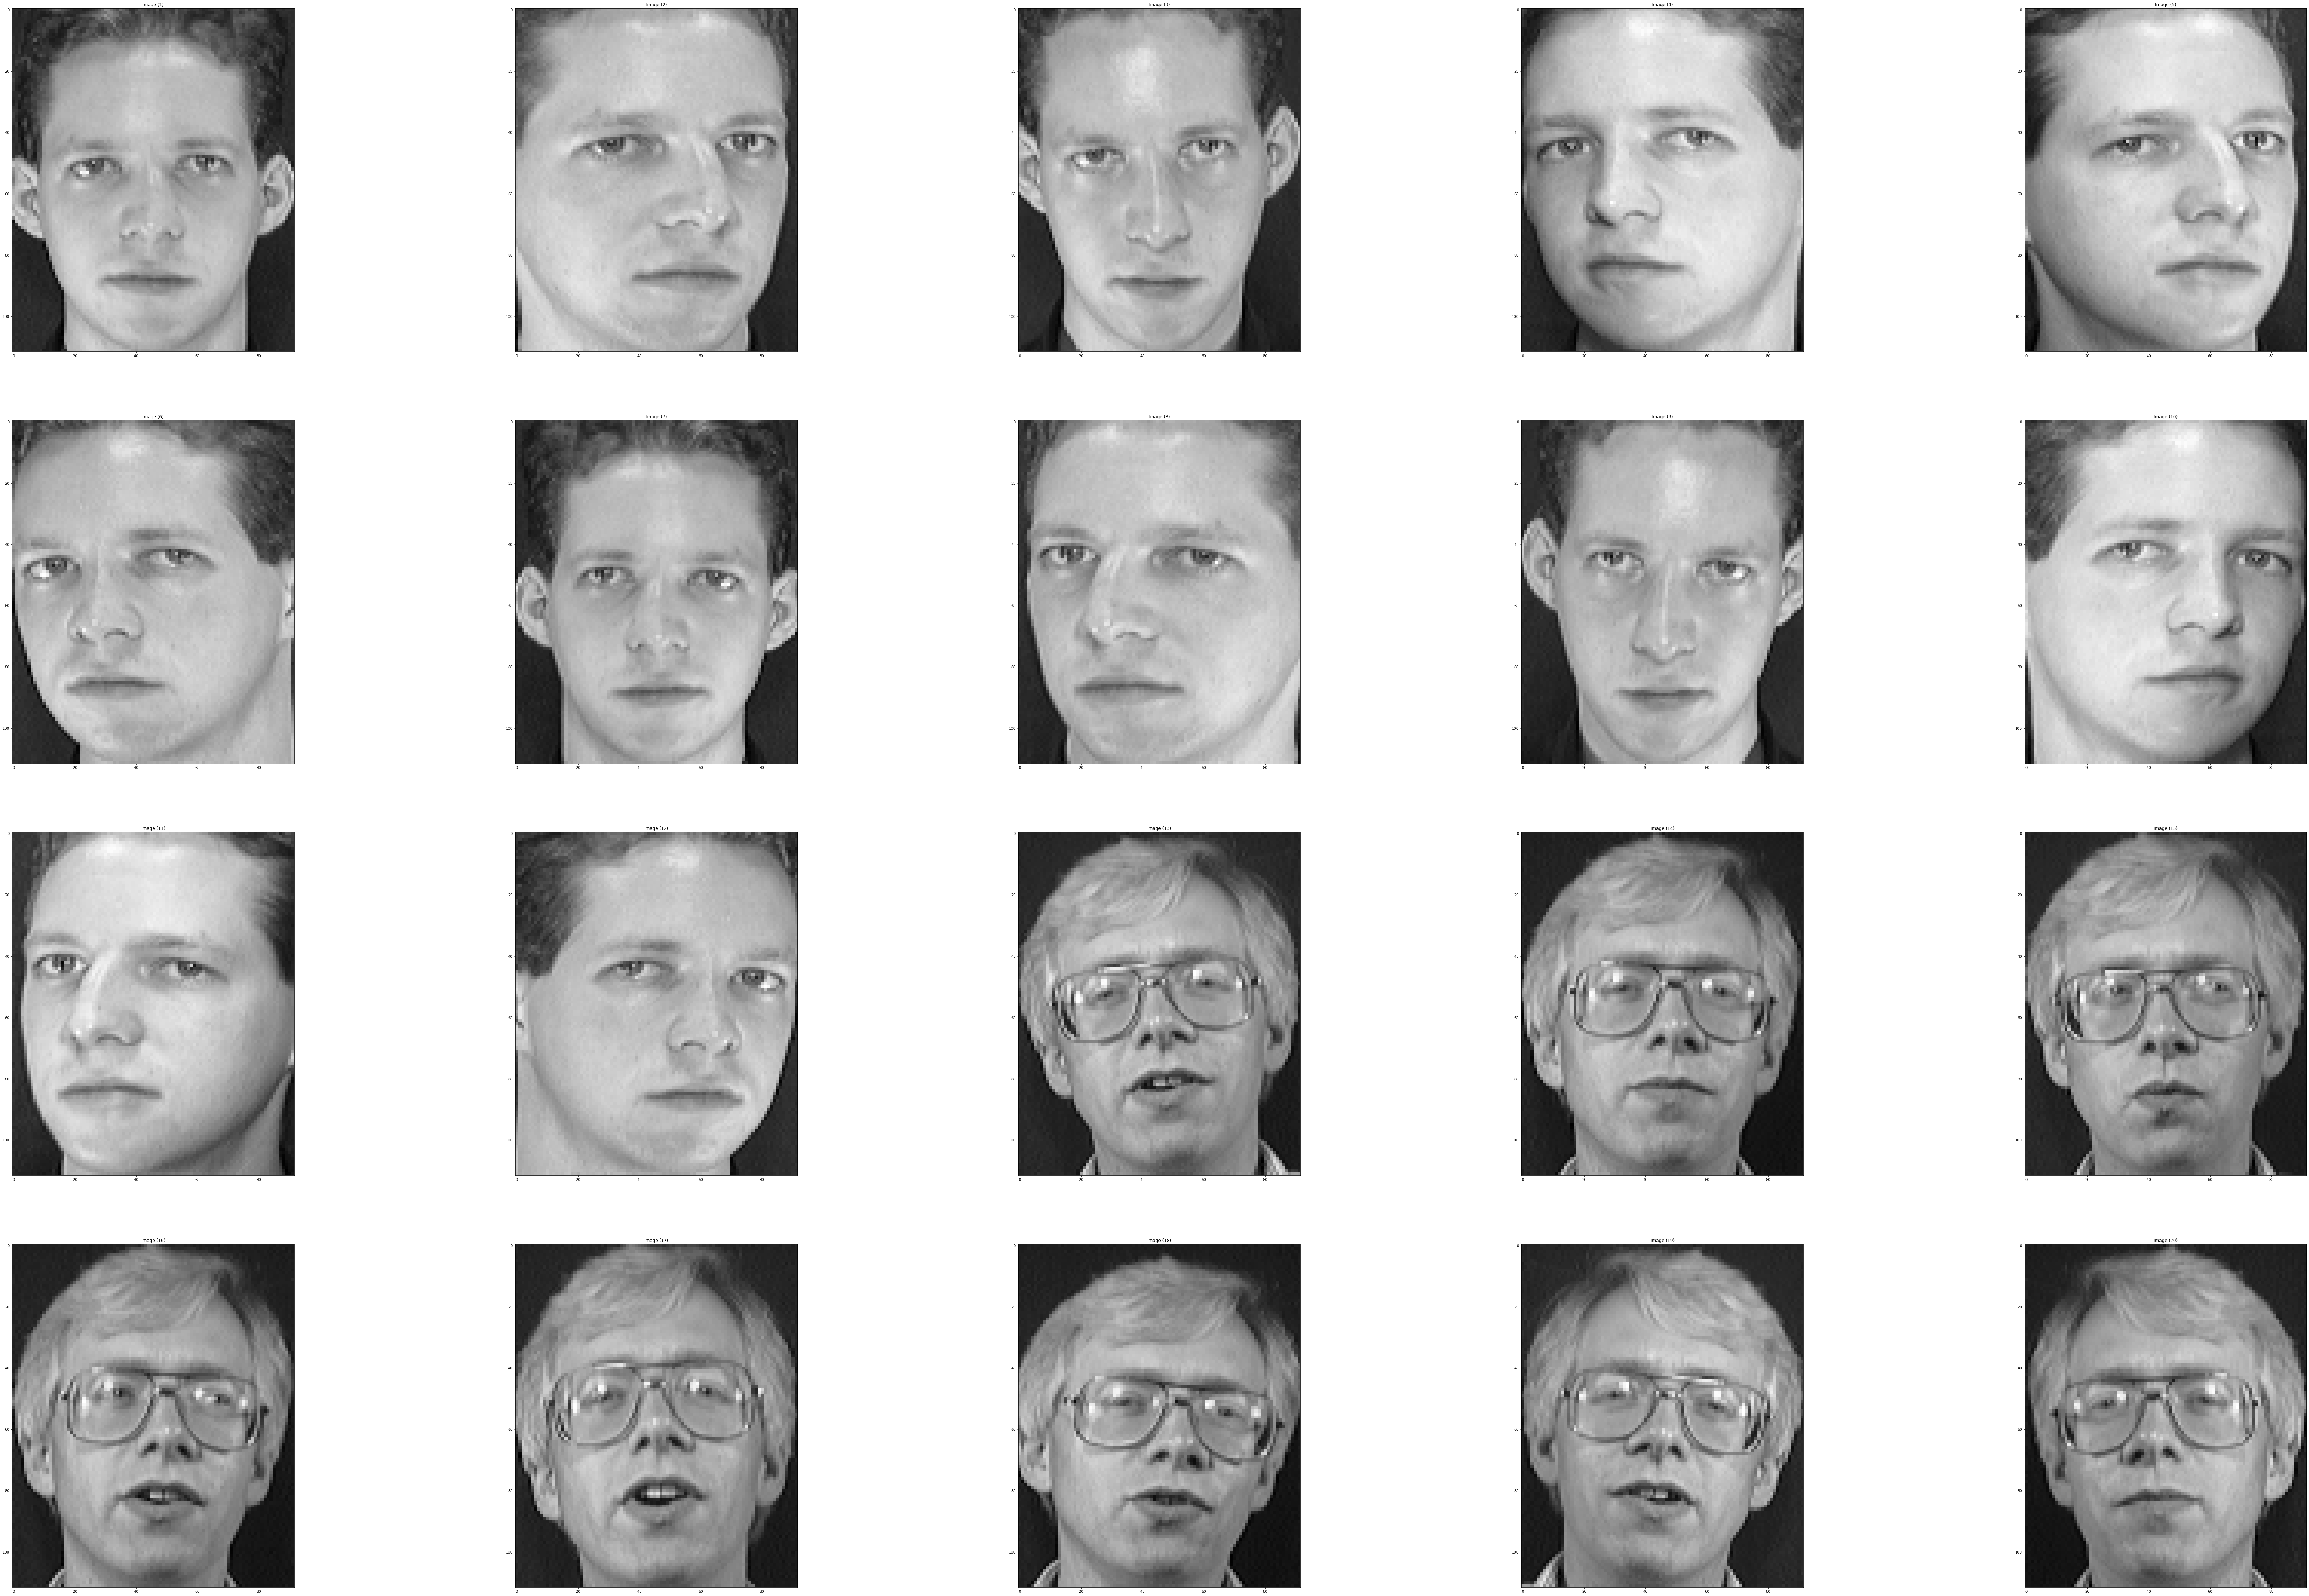

In [42]:
show_images(samples,4)

# Adding additional dimension to the data

In [43]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Scaling and Normalizing the data 

In [44]:

X_test/=255
X_train/=255
x_train = X_train.astype('float32')
x_test  = X_test.astype('float32')

In [11]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (240, 112, 92, 1)
240 train samples
160 test samples


# Converting class vectors to binary class matrices

In [12]:

y_train = keras.utils.to_categorical(y_train)
y_test  = keras.utils.to_categorical(y_test)


## Model Description
* Using Convulution Layers to extract Features from the Images 
* DropOut Layer is Used to Tackle the Overfitting 
* Using Pooling Layer to reduce the spatial size of the representation to reduce the amount of parameters and computation in the network.
* Using Sigmoid function as activation function for the output Layer 
* Using Catogerical Class entropy as Loss Function as there are more than 2 classes 
* Using Adadelta as Optimizer to tune the weight of the network

In [13]:
model = Sequential()

#add model layers
model.add(Conv2D(128, kernel_size=2, activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=2, activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=2, activation='relu'))
model.add(Conv2D(64, kernel_size=2, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(20, activation='sigmoid'))

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Model Visualization

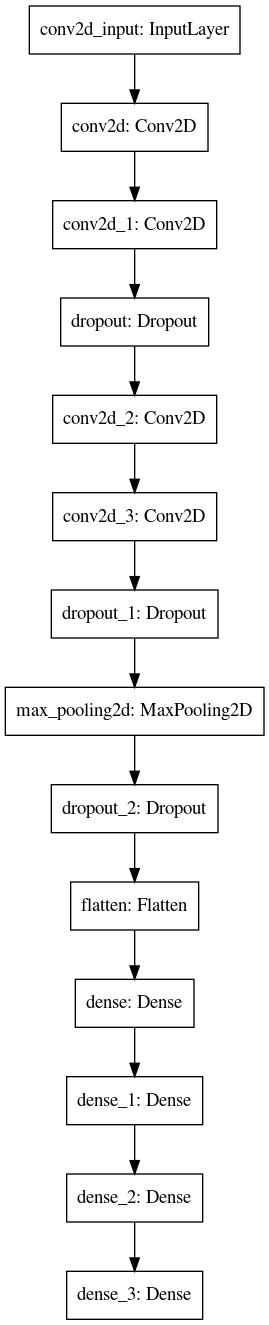

In [46]:
from keras.utils import plot_model

plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    dpi=96,
)

# Setting up Hyperparameters 



In [47]:
batch_size=128
epochs=1500

# Training the model

In [15]:
history = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs, 
                      validation_data=(x_test, y_test))

Epoch 1/1500
2/2 [==============================] - 1s 570ms/step - loss: 2.9959 - accuracy: 0.0500 - val_loss: 2.9956 - val_accuracy: 0.0437
Epoch 2/1500
2/2 [==============================] - 0s 152ms/step - loss: 2.9960 - accuracy: 0.0500 - val_loss: 2.9956 - val_accuracy: 0.0437
Epoch 3/1500
2/2 [==============================] - 0s 137ms/step - loss: 2.9960 - accuracy: 0.0667 - val_loss: 2.9955 - val_accuracy: 0.0437
Epoch 4/1500
2/2 [==============================] - 0s 136ms/step - loss: 2.9958 - accuracy: 0.0458 - val_loss: 2.9955 - val_accuracy: 0.0437
Epoch 5/1500
2/2 [==============================] - 0s 130ms/step - loss: 2.9958 - accuracy: 0.0417 - val_loss: 2.9955 - val_accuracy: 0.0437
Epoch 6/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9956 - accuracy: 0.0625 - val_loss: 2.9955 - val_accuracy: 0.0500
Epoch 7/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9958 - accuracy: 0.0458 - val_loss: 2.9955 - val_accuracy: 0.0500
Epoch 

2/2 [==============================] - 0s 128ms/step - loss: 2.9924 - accuracy: 0.0792 - val_loss: 2.9936 - val_accuracy: 0.0875
Epoch 116/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9928 - accuracy: 0.0458 - val_loss: 2.9936 - val_accuracy: 0.0875
Epoch 117/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9925 - accuracy: 0.0583 - val_loss: 2.9936 - val_accuracy: 0.0875
Epoch 118/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9928 - accuracy: 0.0583 - val_loss: 2.9936 - val_accuracy: 0.0875
Epoch 119/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9924 - accuracy: 0.0708 - val_loss: 2.9936 - val_accuracy: 0.0875
Epoch 120/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9926 - accuracy: 0.0708 - val_loss: 2.9936 - val_accuracy: 0.0875
Epoch 121/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9924 - accuracy: 0.0708 - val_loss: 2.9935 - val_accuracy: 0.0875
Epoch 1

Epoch 172/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9908 - accuracy: 0.0417 - val_loss: 2.9927 - val_accuracy: 0.1063
Epoch 173/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9917 - accuracy: 0.0458 - val_loss: 2.9927 - val_accuracy: 0.1063
Epoch 174/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9915 - accuracy: 0.0792 - val_loss: 2.9926 - val_accuracy: 0.1063
Epoch 175/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9911 - accuracy: 0.0542 - val_loss: 2.9926 - val_accuracy: 0.1063
Epoch 176/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9914 - accuracy: 0.0708 - val_loss: 2.9926 - val_accuracy: 0.1063
Epoch 177/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9909 - accuracy: 0.0792 - val_loss: 2.9926 - val_accuracy: 0.1063
Epoch 178/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9911 - accuracy: 0.0833 - val_loss: 2.9926 - val_accuracy:

Epoch 229/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9893 - accuracy: 0.0833 - val_loss: 2.9915 - val_accuracy: 0.1000
Epoch 230/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9894 - accuracy: 0.1083 - val_loss: 2.9915 - val_accuracy: 0.1000
Epoch 231/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9890 - accuracy: 0.1167 - val_loss: 2.9915 - val_accuracy: 0.1063
Epoch 232/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9891 - accuracy: 0.0667 - val_loss: 2.9915 - val_accuracy: 0.1063
Epoch 233/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9884 - accuracy: 0.0875 - val_loss: 2.9915 - val_accuracy: 0.1063
Epoch 234/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9889 - accuracy: 0.1042 - val_loss: 2.9915 - val_accuracy: 0.1063
Epoch 235/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9892 - accuracy: 0.0833 - val_loss: 2.9914 - val_accuracy:

Epoch 286/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9866 - accuracy: 0.1125 - val_loss: 2.9903 - val_accuracy: 0.1187
Epoch 287/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9870 - accuracy: 0.1042 - val_loss: 2.9903 - val_accuracy: 0.1187
Epoch 288/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9862 - accuracy: 0.0917 - val_loss: 2.9902 - val_accuracy: 0.1187
Epoch 289/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9864 - accuracy: 0.1083 - val_loss: 2.9902 - val_accuracy: 0.1187
Epoch 290/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9865 - accuracy: 0.1042 - val_loss: 2.9902 - val_accuracy: 0.1187
Epoch 291/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9864 - accuracy: 0.1208 - val_loss: 2.9902 - val_accuracy: 0.1125
Epoch 292/1500
2/2 [==============================] - 0s 130ms/step - loss: 2.9855 - accuracy: 0.1000 - val_loss: 2.9901 - val_accuracy:

Epoch 343/1500
2/2 [==============================] - 0s 138ms/step - loss: 2.9834 - accuracy: 0.1083 - val_loss: 2.9886 - val_accuracy: 0.1125
Epoch 344/1500
2/2 [==============================] - 0s 131ms/step - loss: 2.9841 - accuracy: 0.0875 - val_loss: 2.9886 - val_accuracy: 0.1125
Epoch 345/1500
2/2 [==============================] - 0s 130ms/step - loss: 2.9833 - accuracy: 0.1083 - val_loss: 2.9886 - val_accuracy: 0.1125
Epoch 346/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9830 - accuracy: 0.0833 - val_loss: 2.9885 - val_accuracy: 0.1125
Epoch 347/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9838 - accuracy: 0.1208 - val_loss: 2.9885 - val_accuracy: 0.1125
Epoch 348/1500
2/2 [==============================] - 0s 130ms/step - loss: 2.9840 - accuracy: 0.1250 - val_loss: 2.9885 - val_accuracy: 0.1125
Epoch 349/1500
2/2 [==============================] - 0s 130ms/step - loss: 2.9833 - accuracy: 0.1292 - val_loss: 2.9885 - val_accuracy:

Epoch 400/1500
2/2 [==============================] - 0s 136ms/step - loss: 2.9795 - accuracy: 0.1250 - val_loss: 2.9867 - val_accuracy: 0.1312
Epoch 401/1500
2/2 [==============================] - 0s 132ms/step - loss: 2.9817 - accuracy: 0.1250 - val_loss: 2.9866 - val_accuracy: 0.1375
Epoch 402/1500
2/2 [==============================] - 0s 130ms/step - loss: 2.9790 - accuracy: 0.1208 - val_loss: 2.9866 - val_accuracy: 0.1375
Epoch 403/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9799 - accuracy: 0.1458 - val_loss: 2.9865 - val_accuracy: 0.1375
Epoch 404/1500
2/2 [==============================] - 0s 131ms/step - loss: 2.9794 - accuracy: 0.1208 - val_loss: 2.9865 - val_accuracy: 0.1375
Epoch 405/1500
2/2 [==============================] - 0s 132ms/step - loss: 2.9794 - accuracy: 0.1542 - val_loss: 2.9865 - val_accuracy: 0.1375
Epoch 406/1500
2/2 [==============================] - 0s 130ms/step - loss: 2.9801 - accuracy: 0.1167 - val_loss: 2.9864 - val_accuracy:

Epoch 457/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9759 - accuracy: 0.1250 - val_loss: 2.9840 - val_accuracy: 0.1750
Epoch 458/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9766 - accuracy: 0.1333 - val_loss: 2.9840 - val_accuracy: 0.1750
Epoch 459/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9745 - accuracy: 0.1792 - val_loss: 2.9840 - val_accuracy: 0.1750
Epoch 460/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9752 - accuracy: 0.1417 - val_loss: 2.9839 - val_accuracy: 0.1750
Epoch 461/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9764 - accuracy: 0.1458 - val_loss: 2.9838 - val_accuracy: 0.1813
Epoch 462/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9750 - accuracy: 0.1667 - val_loss: 2.9838 - val_accuracy: 0.1875
Epoch 463/1500
2/2 [==============================] - 0s 131ms/step - loss: 2.9738 - accuracy: 0.1792 - val_loss: 2.9837 - val_accuracy:

Epoch 514/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9699 - accuracy: 0.1875 - val_loss: 2.9807 - val_accuracy: 0.1688
Epoch 515/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9694 - accuracy: 0.2125 - val_loss: 2.9806 - val_accuracy: 0.1750
Epoch 516/1500
2/2 [==============================] - 0s 142ms/step - loss: 2.9700 - accuracy: 0.2000 - val_loss: 2.9806 - val_accuracy: 0.1875
Epoch 517/1500
2/2 [==============================] - 0s 131ms/step - loss: 2.9705 - accuracy: 0.1750 - val_loss: 2.9805 - val_accuracy: 0.1813
Epoch 518/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9690 - accuracy: 0.1833 - val_loss: 2.9804 - val_accuracy: 0.1813
Epoch 519/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9688 - accuracy: 0.1750 - val_loss: 2.9803 - val_accuracy: 0.1813
Epoch 520/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9692 - accuracy: 0.1833 - val_loss: 2.9803 - val_accuracy:

Epoch 571/1500
2/2 [==============================] - 0s 138ms/step - loss: 2.9611 - accuracy: 0.2125 - val_loss: 2.9762 - val_accuracy: 0.1688
Epoch 572/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9619 - accuracy: 0.2042 - val_loss: 2.9761 - val_accuracy: 0.1750
Epoch 573/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9617 - accuracy: 0.2208 - val_loss: 2.9760 - val_accuracy: 0.1750
Epoch 574/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9626 - accuracy: 0.1833 - val_loss: 2.9760 - val_accuracy: 0.1750
Epoch 575/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9602 - accuracy: 0.2250 - val_loss: 2.9759 - val_accuracy: 0.1750
Epoch 576/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9608 - accuracy: 0.2208 - val_loss: 2.9758 - val_accuracy: 0.1813
Epoch 577/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9623 - accuracy: 0.2000 - val_loss: 2.9757 - val_accuracy:

Epoch 628/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9516 - accuracy: 0.2208 - val_loss: 2.9703 - val_accuracy: 0.1813
Epoch 629/1500
2/2 [==============================] - 0s 131ms/step - loss: 2.9515 - accuracy: 0.2292 - val_loss: 2.9702 - val_accuracy: 0.1813
Epoch 630/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9508 - accuracy: 0.2417 - val_loss: 2.9700 - val_accuracy: 0.1813
Epoch 631/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9531 - accuracy: 0.2208 - val_loss: 2.9699 - val_accuracy: 0.1813
Epoch 632/1500
2/2 [==============================] - 0s 134ms/step - loss: 2.9507 - accuracy: 0.2250 - val_loss: 2.9698 - val_accuracy: 0.1875
Epoch 633/1500
2/2 [==============================] - 0s 130ms/step - loss: 2.9519 - accuracy: 0.2375 - val_loss: 2.9697 - val_accuracy: 0.1875
Epoch 634/1500
2/2 [==============================] - 0s 132ms/step - loss: 2.9513 - accuracy: 0.2125 - val_loss: 2.9696 - val_accuracy:

Epoch 685/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9405 - accuracy: 0.2250 - val_loss: 2.9628 - val_accuracy: 0.1875
Epoch 686/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9409 - accuracy: 0.2042 - val_loss: 2.9626 - val_accuracy: 0.1875
Epoch 687/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9406 - accuracy: 0.2250 - val_loss: 2.9625 - val_accuracy: 0.1813
Epoch 688/1500
2/2 [==============================] - 0s 126ms/step - loss: 2.9393 - accuracy: 0.1875 - val_loss: 2.9623 - val_accuracy: 0.1875
Epoch 689/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9390 - accuracy: 0.2333 - val_loss: 2.9622 - val_accuracy: 0.1875
Epoch 690/1500
2/2 [==============================] - 0s 132ms/step - loss: 2.9380 - accuracy: 0.2125 - val_loss: 2.9620 - val_accuracy: 0.1875
Epoch 691/1500
2/2 [==============================] - 0s 134ms/step - loss: 2.9372 - accuracy: 0.2292 - val_loss: 2.9619 - val_accuracy:

Epoch 742/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9266 - accuracy: 0.2042 - val_loss: 2.9530 - val_accuracy: 0.2062
Epoch 743/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9239 - accuracy: 0.2250 - val_loss: 2.9528 - val_accuracy: 0.2062
Epoch 744/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9252 - accuracy: 0.2417 - val_loss: 2.9527 - val_accuracy: 0.2062
Epoch 745/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9247 - accuracy: 0.2458 - val_loss: 2.9525 - val_accuracy: 0.2125
Epoch 746/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9246 - accuracy: 0.2333 - val_loss: 2.9523 - val_accuracy: 0.2125
Epoch 747/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.9237 - accuracy: 0.2250 - val_loss: 2.9521 - val_accuracy: 0.2188
Epoch 748/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.9230 - accuracy: 0.2333 - val_loss: 2.9518 - val_accuracy:

Epoch 799/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9062 - accuracy: 0.2333 - val_loss: 2.9406 - val_accuracy: 0.2313
Epoch 800/1500
2/2 [==============================] - 0s 130ms/step - loss: 2.9029 - accuracy: 0.2458 - val_loss: 2.9404 - val_accuracy: 0.2313
Epoch 801/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9058 - accuracy: 0.2417 - val_loss: 2.9401 - val_accuracy: 0.2313
Epoch 802/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9055 - accuracy: 0.2208 - val_loss: 2.9398 - val_accuracy: 0.2375
Epoch 803/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9036 - accuracy: 0.2292 - val_loss: 2.9396 - val_accuracy: 0.2313
Epoch 804/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9045 - accuracy: 0.2375 - val_loss: 2.9393 - val_accuracy: 0.2313
Epoch 805/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.9030 - accuracy: 0.2250 - val_loss: 2.9392 - val_accuracy:

Epoch 856/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.8824 - accuracy: 0.2583 - val_loss: 2.9250 - val_accuracy: 0.2438
Epoch 857/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.8823 - accuracy: 0.2667 - val_loss: 2.9248 - val_accuracy: 0.2438
Epoch 858/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.8796 - accuracy: 0.2500 - val_loss: 2.9245 - val_accuracy: 0.2375
Epoch 859/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.8822 - accuracy: 0.2583 - val_loss: 2.9241 - val_accuracy: 0.2375
Epoch 860/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.8818 - accuracy: 0.2375 - val_loss: 2.9238 - val_accuracy: 0.2375
Epoch 861/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.8795 - accuracy: 0.2542 - val_loss: 2.9235 - val_accuracy: 0.2375
Epoch 862/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.8801 - accuracy: 0.2542 - val_loss: 2.9231 - val_accuracy:

Epoch 913/1500
2/2 [==============================] - 0s 130ms/step - loss: 2.8527 - accuracy: 0.2833 - val_loss: 2.9054 - val_accuracy: 0.2625
Epoch 914/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.8522 - accuracy: 0.2792 - val_loss: 2.9051 - val_accuracy: 0.2625
Epoch 915/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.8542 - accuracy: 0.2500 - val_loss: 2.9047 - val_accuracy: 0.2562
Epoch 916/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.8506 - accuracy: 0.2708 - val_loss: 2.9042 - val_accuracy: 0.2562
Epoch 917/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.8487 - accuracy: 0.2375 - val_loss: 2.9038 - val_accuracy: 0.2625
Epoch 918/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.8533 - accuracy: 0.2375 - val_loss: 2.9034 - val_accuracy: 0.2625
Epoch 919/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.8508 - accuracy: 0.2500 - val_loss: 2.9030 - val_accuracy:

Epoch 970/1500
2/2 [==============================] - 0s 133ms/step - loss: 2.8183 - accuracy: 0.2708 - val_loss: 2.8803 - val_accuracy: 0.2688
Epoch 971/1500
2/2 [==============================] - 0s 130ms/step - loss: 2.8161 - accuracy: 0.2708 - val_loss: 2.8799 - val_accuracy: 0.2688
Epoch 972/1500
2/2 [==============================] - 0s 130ms/step - loss: 2.8192 - accuracy: 0.2833 - val_loss: 2.8793 - val_accuracy: 0.2688
Epoch 973/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.8176 - accuracy: 0.2583 - val_loss: 2.8788 - val_accuracy: 0.2688
Epoch 974/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.8164 - accuracy: 0.2542 - val_loss: 2.8784 - val_accuracy: 0.2688
Epoch 975/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.8150 - accuracy: 0.2667 - val_loss: 2.8780 - val_accuracy: 0.2688
Epoch 976/1500
2/2 [==============================] - 0s 132ms/step - loss: 2.8159 - accuracy: 0.2583 - val_loss: 2.8774 - val_accuracy:

Epoch 1027/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.7746 - accuracy: 0.3167 - val_loss: 2.8492 - val_accuracy: 0.2812
Epoch 1028/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.7743 - accuracy: 0.3000 - val_loss: 2.8487 - val_accuracy: 0.2812
Epoch 1029/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.7753 - accuracy: 0.2792 - val_loss: 2.8481 - val_accuracy: 0.2812
Epoch 1030/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.7746 - accuracy: 0.2917 - val_loss: 2.8475 - val_accuracy: 0.2812
Epoch 1031/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.7743 - accuracy: 0.2708 - val_loss: 2.8469 - val_accuracy: 0.2812
Epoch 1032/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.7723 - accuracy: 0.2667 - val_loss: 2.8463 - val_accuracy: 0.2812
Epoch 1033/1500
2/2 [==============================] - 0s 136ms/step - loss: 2.7722 - accuracy: 0.2833 - val_loss: 2.8456 - val_ac

2/2 [==============================] - 0s 150ms/step - loss: 2.6513 - accuracy: 0.2667 - val_loss: 2.7535 - val_accuracy: 0.2625
Epoch 1140/1500
2/2 [==============================] - 0s 137ms/step - loss: 2.6527 - accuracy: 0.2667 - val_loss: 2.7524 - val_accuracy: 0.2625
Epoch 1141/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.6473 - accuracy: 0.2833 - val_loss: 2.7512 - val_accuracy: 0.2625
Epoch 1142/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.6469 - accuracy: 0.2833 - val_loss: 2.7501 - val_accuracy: 0.2625
Epoch 1143/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.6456 - accuracy: 0.2583 - val_loss: 2.7490 - val_accuracy: 0.2625
Epoch 1144/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.6467 - accuracy: 0.2667 - val_loss: 2.7480 - val_accuracy: 0.2625
Epoch 1145/1500
2/2 [==============================] - 0s 132ms/step - loss: 2.6405 - accuracy: 0.2625 - val_loss: 2.7464 - val_accuracy: 0.2625
E

2/2 [==============================] - 0s 127ms/step - loss: 2.4382 - accuracy: 0.2125 - val_loss: 2.5907 - val_accuracy: 0.1562
Epoch 1252/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.4257 - accuracy: 0.2167 - val_loss: 2.5881 - val_accuracy: 0.1625
Epoch 1253/1500
2/2 [==============================] - 0s 129ms/step - loss: 2.4258 - accuracy: 0.2208 - val_loss: 2.5853 - val_accuracy: 0.1500
Epoch 1254/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.4271 - accuracy: 0.2333 - val_loss: 2.5825 - val_accuracy: 0.1625
Epoch 1255/1500
2/2 [==============================] - 0s 128ms/step - loss: 2.4155 - accuracy: 0.2292 - val_loss: 2.5802 - val_accuracy: 0.1562
Epoch 1256/1500
2/2 [==============================] - 0s 127ms/step - loss: 2.4129 - accuracy: 0.2167 - val_loss: 2.5776 - val_accuracy: 0.1625
Epoch 1257/1500
2/2 [==============================] - 0s 130ms/step - loss: 2.4135 - accuracy: 0.2333 - val_loss: 2.5755 - val_accuracy: 0.1562
E

2/2 [==============================] - 0s 129ms/step - loss: 1.9170 - accuracy: 0.2417 - val_loss: 2.1695 - val_accuracy: 0.1500
Epoch 1364/1500
2/2 [==============================] - 0s 128ms/step - loss: 1.9059 - accuracy: 0.2250 - val_loss: 2.1657 - val_accuracy: 0.1500
Epoch 1365/1500
2/2 [==============================] - 0s 128ms/step - loss: 1.9049 - accuracy: 0.2208 - val_loss: 2.1604 - val_accuracy: 0.1500
Epoch 1366/1500
2/2 [==============================] - 0s 129ms/step - loss: 1.8830 - accuracy: 0.2583 - val_loss: 2.1552 - val_accuracy: 0.1500
Epoch 1367/1500
2/2 [==============================] - 0s 129ms/step - loss: 1.8889 - accuracy: 0.2500 - val_loss: 2.1515 - val_accuracy: 0.1500
Epoch 1368/1500
2/2 [==============================] - 0s 128ms/step - loss: 1.8781 - accuracy: 0.2458 - val_loss: 2.1442 - val_accuracy: 0.1500
Epoch 1369/1500
2/2 [==============================] - 0s 127ms/step - loss: 1.8721 - accuracy: 0.2417 - val_loss: 2.1425 - val_accuracy: 0.1500
E

2/2 [==============================] - 0s 128ms/step - loss: 1.1025 - accuracy: 0.5958 - val_loss: 1.5189 - val_accuracy: 0.4563
Epoch 1476/1500
2/2 [==============================] - 0s 129ms/step - loss: 1.0991 - accuracy: 0.5958 - val_loss: 1.5097 - val_accuracy: 0.4812
Epoch 1477/1500
2/2 [==============================] - 0s 128ms/step - loss: 1.0729 - accuracy: 0.6208 - val_loss: 1.5003 - val_accuracy: 0.4688
Epoch 1478/1500
2/2 [==============================] - 0s 128ms/step - loss: 1.0859 - accuracy: 0.6000 - val_loss: 1.4866 - val_accuracy: 0.4875
Epoch 1479/1500
2/2 [==============================] - 0s 130ms/step - loss: 1.0735 - accuracy: 0.6083 - val_loss: 1.4890 - val_accuracy: 0.4875
Epoch 1480/1500
2/2 [==============================] - 0s 130ms/step - loss: 1.0512 - accuracy: 0.6500 - val_loss: 1.4750 - val_accuracy: 0.4750
Epoch 1481/1500
2/2 [==============================] - 0s 129ms/step - loss: 1.0461 - accuracy: 0.6333 - val_loss: 1.4583 - val_accuracy: 0.4812
E

# Testing models accuracy on the test data and accuracy obtained is 75% 
# Model needs to be further trained to generalize the new samples and to improve performance

In [16]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 11ms/step - loss: 1.2585 - accuracy: 0.7500


[1.2584853172302246, 0.75]

# Retraining the model again for another 1500 Epochs to check if the model accuracy Improves 

In [17]:
history = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs, 
                      validation_data=(x_test, y_test))

Epoch 1/1500
2/2 [==============================] - 0s 147ms/step - loss: 0.7914 - accuracy: 0.8250 - val_loss: 1.2667 - val_accuracy: 0.7063
Epoch 2/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.7960 - accuracy: 0.8125 - val_loss: 1.2608 - val_accuracy: 0.7250
Epoch 3/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.7557 - accuracy: 0.8250 - val_loss: 1.2381 - val_accuracy: 0.7063
Epoch 4/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.7406 - accuracy: 0.8333 - val_loss: 1.2153 - val_accuracy: 0.7688
Epoch 5/1500
2/2 [==============================] - 0s 133ms/step - loss: 0.7395 - accuracy: 0.8333 - val_loss: 1.2085 - val_accuracy: 0.7625
Epoch 6/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.7287 - accuracy: 0.8708 - val_loss: 1.2009 - val_accuracy: 0.8062
Epoch 7/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.7124 - accuracy: 0.8417 - val_loss: 1.1880 - val_accuracy: 0.8062
Epoch 

2/2 [==============================] - 0s 132ms/step - loss: 0.1727 - accuracy: 0.9500 - val_loss: 0.6115 - val_accuracy: 0.8625
Epoch 116/1500
2/2 [==============================] - 0s 131ms/step - loss: 0.1646 - accuracy: 0.9500 - val_loss: 0.6053 - val_accuracy: 0.8687
Epoch 117/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.1634 - accuracy: 0.9500 - val_loss: 0.5965 - val_accuracy: 0.8687
Epoch 118/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.1645 - accuracy: 0.9458 - val_loss: 0.5997 - val_accuracy: 0.8562
Epoch 119/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.1551 - accuracy: 0.9542 - val_loss: 0.6064 - val_accuracy: 0.8687
Epoch 120/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.1636 - accuracy: 0.9500 - val_loss: 0.5927 - val_accuracy: 0.8562
Epoch 121/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.1673 - accuracy: 0.9542 - val_loss: 0.5917 - val_accuracy: 0.8562
Epoch 1

Epoch 172/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0842 - accuracy: 0.9958 - val_loss: 0.4991 - val_accuracy: 0.9187
Epoch 173/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0880 - accuracy: 1.0000 - val_loss: 0.4928 - val_accuracy: 0.9000
Epoch 174/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0901 - accuracy: 1.0000 - val_loss: 0.5033 - val_accuracy: 0.9250
Epoch 175/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0985 - accuracy: 0.9958 - val_loss: 0.4955 - val_accuracy: 0.9125
Epoch 176/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0958 - accuracy: 0.9917 - val_loss: 0.4923 - val_accuracy: 0.9125
Epoch 177/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0833 - accuracy: 1.0000 - val_loss: 0.4983 - val_accuracy: 0.9187
Epoch 178/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0773 - accuracy: 1.0000 - val_loss: 0.4963 - val_accuracy:

Epoch 229/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0583 - accuracy: 1.0000 - val_loss: 0.4433 - val_accuracy: 0.9062
Epoch 230/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0572 - accuracy: 1.0000 - val_loss: 0.4399 - val_accuracy: 0.9062
Epoch 231/1500
2/2 [==============================] - 0s 136ms/step - loss: 0.0568 - accuracy: 1.0000 - val_loss: 0.4437 - val_accuracy: 0.9000
Epoch 232/1500
2/2 [==============================] - 0s 130ms/step - loss: 0.0613 - accuracy: 1.0000 - val_loss: 0.4532 - val_accuracy: 0.9125
Epoch 233/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0473 - accuracy: 1.0000 - val_loss: 0.4457 - val_accuracy: 0.9250
Epoch 234/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0538 - accuracy: 0.9958 - val_loss: 0.4435 - val_accuracy: 0.9250
Epoch 235/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0607 - accuracy: 1.0000 - val_loss: 0.4411 - val_accuracy:

Epoch 286/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 0.4161 - val_accuracy: 0.9125
Epoch 287/1500
2/2 [==============================] - 0s 134ms/step - loss: 0.0435 - accuracy: 1.0000 - val_loss: 0.4088 - val_accuracy: 0.9250
Epoch 288/1500
2/2 [==============================] - 0s 134ms/step - loss: 0.0448 - accuracy: 1.0000 - val_loss: 0.4076 - val_accuracy: 0.9250
Epoch 289/1500
2/2 [==============================] - 0s 132ms/step - loss: 0.0391 - accuracy: 1.0000 - val_loss: 0.4145 - val_accuracy: 0.9250
Epoch 290/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0406 - accuracy: 1.0000 - val_loss: 0.4154 - val_accuracy: 0.9125
Epoch 291/1500
2/2 [==============================] - 0s 132ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 0.4122 - val_accuracy: 0.9312
Epoch 292/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.4043 - val_accuracy:

Epoch 343/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.3859 - val_accuracy: 0.9125
Epoch 344/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 0.3832 - val_accuracy: 0.9250
Epoch 345/1500
2/2 [==============================] - 0s 126ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 0.3826 - val_accuracy: 0.9250
Epoch 346/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 0.3821 - val_accuracy: 0.9125
Epoch 347/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0271 - accuracy: 1.0000 - val_loss: 0.3823 - val_accuracy: 0.9187
Epoch 348/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.3862 - val_accuracy: 0.9187
Epoch 349/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.3869 - val_accuracy:

Epoch 400/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 0.3797 - val_accuracy: 0.9187
Epoch 401/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.3857 - val_accuracy: 0.9125
Epoch 402/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.3765 - val_accuracy: 0.9187
Epoch 403/1500
2/2 [==============================] - 0s 130ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.3772 - val_accuracy: 0.9187
Epoch 404/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.3785 - val_accuracy: 0.9125
Epoch 405/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 0.3752 - val_accuracy: 0.9187
Epoch 406/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 0.3749 - val_accuracy:

Epoch 457/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 0.3560 - val_accuracy: 0.9250
Epoch 458/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.3621 - val_accuracy: 0.9250
Epoch 459/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.3649 - val_accuracy: 0.9125
Epoch 460/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.3658 - val_accuracy: 0.9125
Epoch 461/1500
2/2 [==============================] - 0s 137ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.3607 - val_accuracy: 0.9187
Epoch 462/1500
2/2 [==============================] - 0s 130ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.3640 - val_accuracy: 0.9187
Epoch 463/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.3615 - val_accuracy:

Epoch 514/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.3622 - val_accuracy: 0.9125
Epoch 515/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.3555 - val_accuracy: 0.9125
Epoch 516/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.3558 - val_accuracy: 0.9125
Epoch 517/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.3388 - val_accuracy: 0.9250
Epoch 518/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.3407 - val_accuracy: 0.9250
Epoch 519/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.3458 - val_accuracy: 0.9250
Epoch 520/1500
2/2 [==============================] - 0s 134ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.3484 - val_accuracy:

Epoch 571/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.3386 - val_accuracy: 0.9250
Epoch 572/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.3454 - val_accuracy: 0.9250
Epoch 573/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.3416 - val_accuracy: 0.9250
Epoch 574/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.3397 - val_accuracy: 0.9250
Epoch 575/1500
2/2 [==============================] - 0s 132ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.3396 - val_accuracy: 0.9250
Epoch 576/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 0.3458 - val_accuracy: 0.9125
Epoch 577/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.3427 - val_accuracy:

Epoch 628/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.3349 - val_accuracy: 0.9375
Epoch 629/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.3410 - val_accuracy: 0.9187
Epoch 630/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.3476 - val_accuracy: 0.9125
Epoch 631/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.3477 - val_accuracy: 0.9250
Epoch 632/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.3435 - val_accuracy: 0.9312
Epoch 633/1500
2/2 [==============================] - 0s 130ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.3496 - val_accuracy: 0.9125
Epoch 634/1500
2/2 [==============================] - 0s 137ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.3497 - val_accuracy:

Epoch 685/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.3379 - val_accuracy: 0.9125
Epoch 686/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.3357 - val_accuracy: 0.9250
Epoch 687/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.3327 - val_accuracy: 0.9375
Epoch 688/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.3350 - val_accuracy: 0.9375
Epoch 689/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.3416 - val_accuracy: 0.9375
Epoch 690/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.3343 - val_accuracy: 0.9375
Epoch 691/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.3352 - val_accuracy:

Epoch 742/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.3327 - val_accuracy: 0.9312
Epoch 743/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.3336 - val_accuracy: 0.9312
Epoch 744/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.3313 - val_accuracy: 0.9375
Epoch 745/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.3308 - val_accuracy: 0.9312
Epoch 746/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.3341 - val_accuracy: 0.9187
Epoch 747/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.3326 - val_accuracy: 0.9187
Epoch 748/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.3344 - val_accuracy:

Epoch 799/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.3372 - val_accuracy: 0.9250
Epoch 800/1500
2/2 [==============================] - 0s 130ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.3360 - val_accuracy: 0.9250
Epoch 801/1500
2/2 [==============================] - 0s 131ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.3374 - val_accuracy: 0.9187
Epoch 802/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.3368 - val_accuracy: 0.9250
Epoch 803/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.3352 - val_accuracy: 0.9187
Epoch 804/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.3319 - val_accuracy: 0.9250
Epoch 805/1500
2/2 [==============================] - 0s 140ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.3359 - val_accuracy:

Epoch 856/1500
2/2 [==============================] - 0s 132ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.3251 - val_accuracy: 0.9312
Epoch 857/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3193 - val_accuracy: 0.9375
Epoch 858/1500
2/2 [==============================] - 0s 132ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.3231 - val_accuracy: 0.9375
Epoch 859/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3250 - val_accuracy: 0.9375
Epoch 860/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3248 - val_accuracy: 0.9375
Epoch 861/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.3317 - val_accuracy: 0.9312
Epoch 862/1500
2/2 [==============================] - 0s 130ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.3292 - val_accuracy:

Epoch 913/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3307 - val_accuracy: 0.9312
Epoch 914/1500
2/2 [==============================] - 0s 136ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.3300 - val_accuracy: 0.9312
Epoch 915/1500
2/2 [==============================] - 0s 130ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3287 - val_accuracy: 0.9375
Epoch 916/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3385 - val_accuracy: 0.9125
Epoch 917/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.3429 - val_accuracy: 0.9312
Epoch 918/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.3373 - val_accuracy: 0.9312
Epoch 919/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3360 - val_accuracy:

Epoch 970/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3342 - val_accuracy: 0.9187
Epoch 971/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.3300 - val_accuracy: 0.9312
Epoch 972/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.3324 - val_accuracy: 0.9250
Epoch 973/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3334 - val_accuracy: 0.9250
Epoch 974/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3320 - val_accuracy: 0.9250
Epoch 975/1500
2/2 [==============================] - 0s 160ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.3320 - val_accuracy: 0.9250
Epoch 976/1500
2/2 [==============================] - 0s 135ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.3342 - val_accuracy:

Epoch 1027/1500
2/2 [==============================] - 0s 130ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3319 - val_accuracy: 0.9250
Epoch 1028/1500
2/2 [==============================] - 0s 130ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.3302 - val_accuracy: 0.9250
Epoch 1029/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3325 - val_accuracy: 0.9250
Epoch 1030/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.3326 - val_accuracy: 0.9250
Epoch 1031/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3310 - val_accuracy: 0.9312
Epoch 1032/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3340 - val_accuracy: 0.9187
Epoch 1033/1500
2/2 [==============================] - 0s 130ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.3319 - val_ac

2/2 [==============================] - 0s 129ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3226 - val_accuracy: 0.9250
Epoch 1140/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3241 - val_accuracy: 0.9250
Epoch 1141/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3234 - val_accuracy: 0.9250
Epoch 1142/1500
2/2 [==============================] - 0s 132ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.3239 - val_accuracy: 0.9250
Epoch 1143/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3212 - val_accuracy: 0.9312
Epoch 1144/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.3216 - val_accuracy: 0.9375
Epoch 1145/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3217 - val_accuracy: 0.9375
E

2/2 [==============================] - 0s 129ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.3246 - val_accuracy: 0.9312
Epoch 1252/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3262 - val_accuracy: 0.9250
Epoch 1253/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3224 - val_accuracy: 0.9312
Epoch 1254/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.3188 - val_accuracy: 0.9375
Epoch 1255/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3202 - val_accuracy: 0.9375
Epoch 1256/1500
2/2 [==============================] - 0s 134ms/step - loss: 0.0065 - accuracy: 0.9958 - val_loss: 0.3169 - val_accuracy: 0.9250
Epoch 1257/1500
2/2 [==============================] - 0s 141ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3182 - val_accuracy: 0.9250
E

2/2 [==============================] - 0s 128ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3176 - val_accuracy: 0.9375
Epoch 1364/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3195 - val_accuracy: 0.9375
Epoch 1365/1500
2/2 [==============================] - 0s 127ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3196 - val_accuracy: 0.9375
Epoch 1366/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3191 - val_accuracy: 0.9312
Epoch 1367/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3207 - val_accuracy: 0.9312
Epoch 1368/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3228 - val_accuracy: 0.9375
Epoch 1369/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.3260 - val_accuracy: 0.9312
E

2/2 [==============================] - 0s 127ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.3277 - val_accuracy: 0.9250
Epoch 1476/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3266 - val_accuracy: 0.9312
Epoch 1477/1500
2/2 [==============================] - 0s 130ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3281 - val_accuracy: 0.9250
Epoch 1478/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3262 - val_accuracy: 0.9312
Epoch 1479/1500
2/2 [==============================] - 0s 129ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3249 - val_accuracy: 0.9312
Epoch 1480/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3248 - val_accuracy: 0.9312
Epoch 1481/1500
2/2 [==============================] - 0s 128ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3236 - val_accuracy: 0.9312
E

# Hurray!! Finally model has learnt to generalize new samples the accuracy of the model improved to 92%

In [18]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 14ms/step - loss: 0.3318 - accuracy: 0.9250


[0.33178097009658813, 0.925000011920929]

# Lets Plot and see how the performance of the Model Improved on each Epoch 

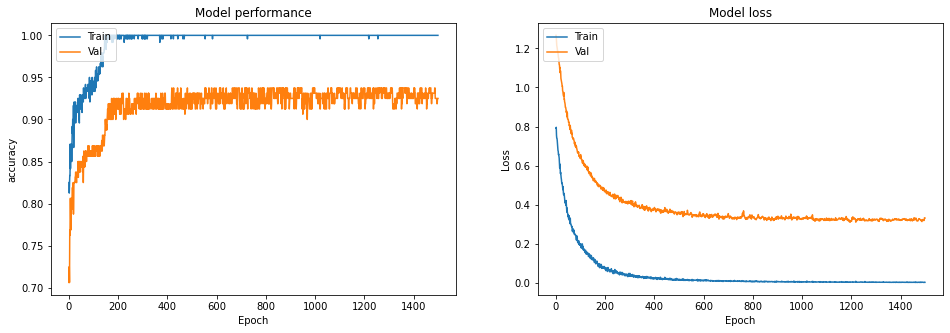

In [48]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Plot training & validation accuracy values
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])

ax1.set_title('Model performance')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])

ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Val'], loc='upper left');